# Milestone 2 - DRQA training notebook

In [1]:
%cd ..
# imports 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import os
from scripts_m2 import *
import torch 
from torch import nn 
from torch import optim

/home/karimgamaleldin/.local/lib/python3.10/site-packages/IPython/core/magics/osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


/home/karimgamaleldin/NLP_PROJECT_111/QA Task milestone


In [2]:
# Getting the dataloaders and tokenizers
train_dataloader, dev_dataloader, tokenizer = prepare_dataloaders_tokenizer()

Loading tokenizer from ./tokenizers/tokenizer.json...
Filtered dataset size: 19922 out of original 20000
Filtered dataset size: 1989 out of original 2000


In [3]:
# View the devices
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

Using device: cuda


### Model Training

In [ ]:
vocab_size = 10000         # Size of the vocabulary
embed_dim = 300            # Dimensionality of the embeddings
hidden_size = 100          # Base hidden size; BiLSTM outputs will be 2*hidden_size
dropout = 0.2
num_layers = 3          # Number of LSTM layers
pad_idx = 1
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Instantiate the BiDAF model
model = DrQAReader(vocab_size=vocab_size, embed_dim=embed_dim, hidden_size=hidden_size, dropout=dropout, pad_idx=pad_idx, num_layers=num_layers)
model = model.to(device)

# Setup an optimizer (e.g., Adam)
optimizer = optim.AdamW(model.parameters(), lr=0.001)
criterion = nn.CrossEntropyLoss()

train_loss, val_loss = train_qa_context_model_boilerplate(
    model=model, 
    train_dataloader=train_dataloader, 
    val_dataloader=dev_dataloader, 
    optimizer=optimizer, 
    criterion=criterion, 
    num_epochs=20, 
    device=device, 
    inputs = ["context", "question", "attention_mask_question"],
    evaluate_val_dataset=True,
)


/home/karimgamaleldin/.local/lib/python3.10/site-packages/torch/optim/lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(
Epoch 1/20: 100%|██████████| 623/623 [01:11<00:00,  8.77it/s, loss=6.31]


Epoch 1 Loss: 6.6530


Evaluating: 100%|██████████| 623/623 [00:44<00:00, 13.91it/s]


Training Loss: 4.5885
Training Metrics: {'start_accuracy': 0.3587993173376167, 'start_precision': 0.3644160037931654, 'start_recall': 0.3587993173376167, 'start_f1_score': 0.35809029728049635, 'end_accuracy': 0.3559883545828732, 'end_precision': 0.36272853742799466, 'end_recall': 0.3559883545828732, 'end_f1_score': 0.35673970209536665, 'joint_exact_match': 0.2693002710571228, 'span_overlap_f1': 0.2914734732482543}


Evaluating: 100%|██████████| 63/63 [00:04<00:00, 13.00it/s]


Validation Loss: 6.8866
Validation Metrics: {'start_accuracy': 0.2161890397184515, 'start_precision': 0.2433027398174011, 'start_recall': 0.2161890397184515, 'start_f1_score': 0.21353022426176546, 'end_accuracy': 0.1975867269984917, 'end_precision': 0.2341804658866961, 'end_recall': 0.1975867269984917, 'end_f1_score': 0.19944002951473566, 'joint_exact_match': 0.13775766716943189, 'span_overlap_f1': 0.1688688979123896}
Validation loss improved to 6.8866. Saving model state.
--------------------------------------------------


Epoch 2/20: 100%|██████████| 623/623 [01:09<00:00,  9.00it/s, loss=4.11]


Epoch 2 Loss: 4.6697


Evaluating: 100%|██████████| 623/623 [00:39<00:00, 15.79it/s]


Training Loss: 3.6720
Training Metrics: {'start_accuracy': 0.4608975002509788, 'start_precision': 0.4668763955229134, 'start_recall': 0.4608975002509788, 'start_f1_score': 0.46064094929364796, 'end_accuracy': 0.4503563899206907, 'end_precision': 0.459112718562878, 'end_recall': 0.4503563899206907, 'end_f1_score': 0.45119997518274074, 'joint_exact_match': 0.38670816183114143, 'span_overlap_f1': 0.4071008111535311}


Evaluating: 100%|██████████| 63/63 [00:03<00:00, 16.10it/s]


Validation Loss: 6.4609
Validation Metrics: {'start_accuracy': 0.2398190045248869, 'start_precision': 0.2722113519350925, 'start_recall': 0.2398190045248869, 'start_f1_score': 0.24320964229955322, 'end_accuracy': 0.2302664655605832, 'end_precision': 0.2535396169985466, 'end_recall': 0.2302664655605832, 'end_f1_score': 0.22941438012786627, 'joint_exact_match': 0.18350930115635997, 'span_overlap_f1': 0.21207921819414585}
Validation loss improved to 6.4609. Saving model state.
--------------------------------------------------


Epoch 3/20: 100%|██████████| 623/623 [01:14<00:00,  8.41it/s, loss=3.45]


Epoch 3 Loss: 3.9636


Evaluating: 100%|██████████| 623/623 [00:43<00:00, 14.42it/s]


Training Loss: 2.9736
Training Metrics: {'start_accuracy': 0.5293645216343741, 'start_precision': 0.534521306473624, 'start_recall': 0.5293645216343741, 'start_f1_score': 0.5281503089997274, 'end_accuracy': 0.5222869189840378, 'end_precision': 0.5281526097071402, 'end_recall': 0.5222869189840378, 'end_f1_score': 0.5216054237838463, 'joint_exact_match': 0.4643610079309306, 'span_overlap_f1': 0.4827239810417336}


Evaluating: 100%|██████████| 63/63 [00:03<00:00, 15.95it/s]


Validation Loss: 6.4650
Validation Metrics: {'start_accuracy': 0.26244343891402716, 'start_precision': 0.29045836822420457, 'start_recall': 0.26244343891402716, 'start_f1_score': 0.2627677262078845, 'end_accuracy': 0.2523881347410759, 'end_precision': 0.28094774112113574, 'end_recall': 0.2523881347410759, 'end_f1_score': 0.2540647996373439, 'joint_exact_match': 0.20563097033685268, 'span_overlap_f1': 0.23772848867638746}
Validation loss did not improve. No improvement for 1 epochs.
--------------------------------------------------


Epoch 4/20: 100%|██████████| 623/623 [01:13<00:00,  8.46it/s, loss=4.14]


Epoch 4 Loss: 3.4400


Evaluating: 100%|██████████| 623/623 [00:50<00:00, 12.42it/s]


Training Loss: 2.4349
Training Metrics: {'start_accuracy': 0.6020981829133621, 'start_precision': 0.6058974940741212, 'start_recall': 0.6020981829133621, 'start_f1_score': 0.601366561050186, 'end_accuracy': 0.599939765083827, 'end_precision': 0.6064021082392493, 'end_recall': 0.599939765083827, 'end_f1_score': 0.598921485016163, 'joint_exact_match': 0.542566007428973, 'span_overlap_f1': 0.5622731928228522}


Evaluating: 100%|██████████| 63/63 [00:04<00:00, 12.81it/s]


Validation Loss: 6.7762
Validation Metrics: {'start_accuracy': 0.26646556058320764, 'start_precision': 0.2821408890491902, 'start_recall': 0.26646556058320764, 'start_f1_score': 0.266488804160484, 'end_accuracy': 0.26395173453996984, 'end_precision': 0.2971653334205929, 'end_recall': 0.26395173453996984, 'end_f1_score': 0.2654764022467488, 'joint_exact_match': 0.21568627450980393, 'span_overlap_f1': 0.24626137296884393}
Validation loss did not improve. No improvement for 2 epochs.
--------------------------------------------------


Epoch 5/20: 100%|██████████| 623/623 [01:17<00:00,  8.00it/s, loss=1.97]


Epoch 5 Loss: 2.9962


Evaluating: 100%|██████████| 623/623 [00:47<00:00, 13.06it/s]


Training Loss: 1.9939
Training Metrics: {'start_accuracy': 0.6725228390723823, 'start_precision': 0.6773493735749526, 'start_recall': 0.6725228390723823, 'start_f1_score': 0.6709426892768249, 'end_accuracy': 0.6713683365123984, 'end_precision': 0.6763650909461859, 'end_recall': 0.6713683365123984, 'end_f1_score': 0.669249383667148, 'joint_exact_match': 0.6174580865374962, 'span_overlap_f1': 0.6358759107456209}


Evaluating: 100%|██████████| 63/63 [00:04<00:00, 13.45it/s]


Validation Loss: 7.1209
Validation Metrics: {'start_accuracy': 0.27802916038210157, 'start_precision': 0.2949430531202447, 'start_recall': 0.27802916038210157, 'start_f1_score': 0.27533520189319316, 'end_accuracy': 0.2654600301659125, 'end_precision': 0.2815976282701036, 'end_recall': 0.2654600301659125, 'end_f1_score': 0.26289691043530033, 'joint_exact_match': 0.22373051784816492, 'span_overlap_f1': 0.2547601703031747}
Validation loss did not improve. No improvement for 3 epochs.
--------------------------------------------------


Epoch 6/20: 100%|██████████| 623/623 [01:14<00:00,  8.31it/s, loss=2.29]


Epoch 6 Loss: 2.2720


Evaluating: 100%|██████████| 623/623 [00:39<00:00, 15.70it/s]


Training Loss: 1.5826
Training Metrics: {'start_accuracy': 0.717297460094368, 'start_precision': 0.7208544250726402, 'start_recall': 0.717297460094368, 'start_f1_score': 0.7160702486597236, 'end_accuracy': 0.7150888465013553, 'end_precision': 0.7198932398301979, 'end_recall': 0.7150888465013553, 'end_f1_score': 0.7131862879127026, 'joint_exact_match': 0.6682060034133119, 'span_overlap_f1': 0.685293865530009}


Evaluating: 100%|██████████| 63/63 [00:04<00:00, 13.58it/s]


Validation Loss: 8.2632
Validation Metrics: {'start_accuracy': 0.27953745600804425, 'start_precision': 0.29818989361150433, 'start_recall': 0.27953745600804425, 'start_f1_score': 0.2792677110597378, 'end_accuracy': 0.27802916038210157, 'end_precision': 0.2977036373960818, 'end_recall': 0.27802916038210157, 'end_f1_score': 0.27650373783335613, 'joint_exact_match': 0.23529411764705882, 'span_overlap_f1': 0.267691968961318}
Validation loss did not improve. No improvement for 4 epochs.
--------------------------------------------------


Epoch 7/20: 100%|██████████| 623/623 [01:15<00:00,  8.23it/s, loss=2.17]


Epoch 7 Loss: 2.0809


Evaluating: 100%|██████████| 623/623 [00:41<00:00, 15.16it/s]


Training Loss: 1.4286
Training Metrics: {'start_accuracy': 0.7409396646923, 'start_precision': 0.7440586547449561, 'start_recall': 0.7409396646923, 'start_f1_score': 0.7398614059105941, 'end_accuracy': 0.7369741993775726, 'end_precision': 0.7416326046905078, 'end_recall': 0.7369741993775726, 'end_f1_score': 0.7354141065555833, 'joint_exact_match': 0.6902921393434394, 'span_overlap_f1': 0.7080375807959464}


Evaluating: 100%|██████████| 63/63 [00:03<00:00, 16.33it/s]

Validation Loss: 8.9184
Validation Metrics: {'start_accuracy': 0.28104575163398693, 'start_precision': 0.2963146063894771, 'start_recall': 0.28104575163398693, 'start_f1_score': 0.2799625929011721, 'end_accuracy': 0.27601809954751133, 'end_precision': 0.2974975694625149, 'end_recall': 0.27601809954751133, 'end_f1_score': 0.2740962360745671, 'joint_exact_match': 0.23529411764705882, 'span_overlap_f1': 0.26600865244450056}
Validation loss did not improve. No improvement for 5 epochs.
Early stopping triggered.
Loaded the best model state.


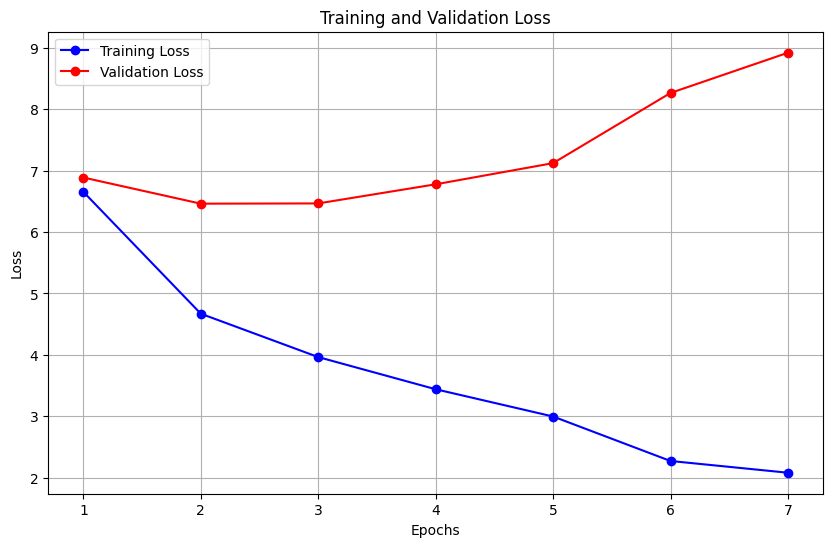

In [5]:
# Plotting the training and validation loss
plot_loss_curves(train_loss, val_loss)

### Saving the model

In [4]:
model_path = "models/qa_context_model_dqra.pkl"

In [7]:
save_model(model, model_path)

Model file models/qa_context_model_dqra.pkl already exists. Skipping save.


In [5]:
model = load_model(model_path=model_path)

Model loaded from models/qa_context_model_dqra.pkl


### Evaluation Metrics Models

##### 1. Evaluation on Training set

In [6]:
# evaluate the model on the dev set
criterion = nn.CrossEntropyLoss(ignore_index=1)
evaluate_qa_context_model_boilerplate(model=model, dataloader=train_dataloader, criterion=criterion, device='cuda', inputs = ["context", "question", "attention_mask_question"], prefix_str="Training")

Evaluating:   0%|          | 0/623 [00:00<?, ?it/s]/home/karimgamaleldin/.local/lib/python3.10/site-packages/torch/nn/modules/rnn.py:1124: UserWarning: RNN module weights are not part of single contiguous chunk of memory. This means they need to be compacted at every call, possibly greatly increasing memory usage. To compact weights again call flatten_parameters(). (Triggered internally at /pytorch/aten/src/ATen/native/cudnn/RNN.cpp:1412.)
  result = _VF.lstm(
Evaluating: 100%|██████████| 623/623 [00:41<00:00, 15.16it/s]


Training Loss: 0.9132
Training Metrics: {'start_accuracy': 0.8374159220961751, 'start_precision': 0.8420309858278996, 'start_recall': 0.8374159220961751, 'start_f1_score': 0.8366143085204243, 'end_accuracy': 0.8294849914667202, 'end_precision': 0.83503216030159, 'end_recall': 0.8294849914667202, 'end_f1_score': 0.8277332544971849, 'joint_exact_match': 0.8001706655958237, 'span_overlap_f1': 0.8164271478540908}


(0.9132137460750714,
 {'start_accuracy': 0.8374159220961751,
  'start_precision': 0.8420309858278996,
  'start_recall': 0.8374159220961751,
  'start_f1_score': 0.8366143085204243,
  'end_accuracy': 0.8294849914667202,
  'end_precision': 0.83503216030159,
  'end_recall': 0.8294849914667202,
  'end_f1_score': 0.8277332544971849,
  'joint_exact_match': 0.8001706655958237,
  'span_overlap_f1': 0.8164271478540908})

##### 2. Evaluation on Test Set

In [7]:
# evaluate the model on the dev set
criterion = nn.CrossEntropyLoss(ignore_index=1)
evaluate_qa_context_model_boilerplate(model=model, dataloader=dev_dataloader, criterion=criterion, device='cuda', inputs = ["context", "question", "attention_mask_question"])

Evaluating:   0%|          | 0/63 [00:00<?, ?it/s]/home/karimgamaleldin/.local/lib/python3.10/site-packages/torch/nn/modules/rnn.py:1124: UserWarning: RNN module weights are not part of single contiguous chunk of memory. This means they need to be compacted at every call, possibly greatly increasing memory usage. To compact weights again call flatten_parameters(). (Triggered internally at /pytorch/aten/src/ATen/native/cudnn/RNN.cpp:1412.)
  result = _VF.lstm(
Evaluating: 100%|██████████| 63/63 [00:04<00:00, 13.91it/s]

Validation Loss: 10.0279
Validation Metrics: {'start_accuracy': 0.2825540472599296, 'start_precision': 0.29814215450112236, 'start_recall': 0.2825540472599296, 'start_f1_score': 0.27711940114715095, 'end_accuracy': 0.2800402212166918, 'end_precision': 0.2927477715903765, 'end_recall': 0.2800402212166918, 'end_f1_score': 0.2725603610493177, 'joint_exact_match': 0.24233283056812469, 'span_overlap_f1': 0.2728981306865846}


(10.027931448013064,
 {'start_accuracy': 0.2825540472599296,
  'start_precision': 0.29814215450112236,
  'start_recall': 0.2825540472599296,
  'start_f1_score': 0.27711940114715095,
  'end_accuracy': 0.2800402212166918,
  'end_precision': 0.2927477715903765,
  'end_recall': 0.2800402212166918,
  'end_f1_score': 0.2725603610493177,
  'joint_exact_match': 0.24233283056812469,
  'span_overlap_f1': 0.2728981306865846})

### Predictions

##### 1. Predection on Dev Set

In [8]:
preds, true_labels, contexts, questions = predict_qa_context_model_boilerplate(model=model, dataloader=dev_dataloader, tokenizer=tokenizer, device='cuda', inputs = ["context", "question", "attention_mask_question"])

Predicting:   0%|          | 0/63 [00:00<?, ?it/s]/home/karimgamaleldin/.local/lib/python3.10/site-packages/torch/nn/modules/rnn.py:1124: UserWarning: RNN module weights are not part of single contiguous chunk of memory. This means they need to be compacted at every call, possibly greatly increasing memory usage. To compact weights again call flatten_parameters(). (Triggered internally at /pytorch/aten/src/ATen/native/cudnn/RNN.cpp:1412.)
  result = _VF.lstm(
Predicting: 100%|██████████| 63/63 [00:04<00:00, 13.40it/s]


In [9]:
# Compare the predictions with the actual answers
for i in range(100):
    print(f"Question: {questions[i]}")
    print(f"Context: {contexts[i]}")
    print(f"Predicted Answer: {preds[i]}")
    print(f"True Answer: {true_labels[i]}")
    print("-" * 50)

Question: how many khitan tumens were there ?
Context: many han chinese and khitan defected to the mongols to fight against the jin . two han chinese leaders , shi tianze , liu heima ( 劉, liu ni ), and the khitan xiao zhala ( ) defected and commanded the 3 tumens in the mongol army . liu heima and shi tianze served ogödei khan . liu heima and shi tianxiang led armies against western xia for the mongols . there were 4 han tumens and 3 khitan tumens , with each tumen consisting of 10 , 000 troops . the three khitan generals shimobeidier ( 石), tabuyir ( 不) and xiaozhacizhizizhongxi ( 之子重喜 ) commanded the three khitan tumens and the four han generals zhang rou , yan shi , shi tianze , and liu heima commanded the four han tumens under ogödei khan .
Predicted Answer: two
True Answer: 3
--------------------------------------------------
Question: what is the atomic number of the element oxygen ?
Context: oxygen is a chemical element with symbol o and atomic number 8 . it is a member of the ch

##### 2. Predicitions on Training Set

In [10]:
train_preds, train_true_labels, train_context, train_questions = predict_qa_context_model_boilerplate(model=model, dataloader=train_dataloader, tokenizer=tokenizer, device='cuda', inputs = ["context", "question", "attention_mask_question"])

Predicting: 100%|██████████| 623/623 [00:49<00:00, 12.59it/s]


In [11]:
# Compare the predictions with the actual answers
for i in range(100):
    print(f"Question: {train_questions[i]}")
    print(f"Context: {train_context[i]}")
    print(f"Predicted Answer: {train_preds[i]}")
    print(f"True Answer: {train_true_labels[i]}")
    print("-" * 50)

Question: how many troops had the japanese lost ?
Context: as many japanese had feared , japan ' s supply arrangements could not maintain her forces . once mutaguchi ' s hopes for an early victory were thwarted , his troops , particularly those at kohima , starved . during may , while mutaguchi continued to order attacks , the allies advanced southwards from kohima and northwards from imphal . the two allied attacks met on 22 june , breaking the japanese siege of imphal . the japanese finally broke off the operation on 3 july . they had lost over 50 , 000 troops , mainly to starvation and disease . this represented the worst defeat suffered by the japanese army to that date .[ citation needed ]
Predicted Answer: 50 , 000
True Answer: 50 , 000
--------------------------------------------------
Question: with the formal end of maratha empire the eic created a firm hold on what country ?
Context: with the gradual weakening of the marathas in the aftermath of the three anglo - maratha wars